In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Load and Check Data

In [2]:
df1 = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df2 = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print(df1.head())
print(df2.head())

df1.info()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
if 'SalePrice' not in df2.columns:
    df2['SalePrice'] = 0
df = pd.concat([df1, df2], axis = 0)
df = df.set_index('Id')

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing Value

In [6]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [7]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

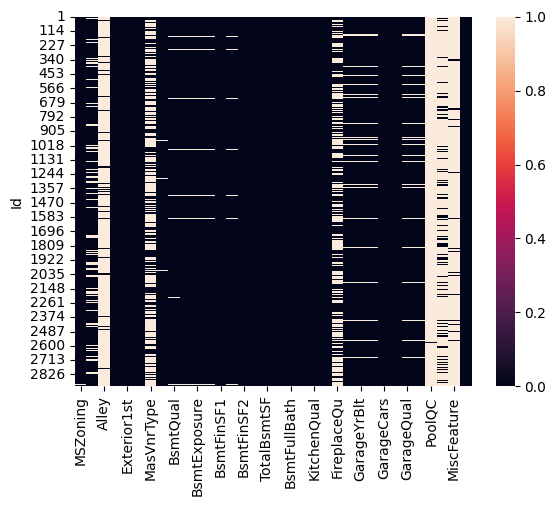

In [8]:
sns.heatmap(df_null.isnull())

In [9]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [10]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [11]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [12]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [13]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [14]:
len(new_df.columns)

304

In [15]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [16]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [17]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

In [18]:
training_data = new_df[0:len(df1)]
testing_data = new_df[len(df1):]
testing_data = testing_data.drop(columns='SalePrice')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(Y_train,(-1, 1))
Y_test = np.reshape(Y_test,(-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

# Predictions

In [21]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred1 = model_1.predict(X_test)
mse = mean_squared_error(Y_test, y_pred1)
r2 = r2_score(Y_test, y_pred1)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 266357285.66377175, R² Score: 0.941376879046271


In [22]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred2 = model_2.predict(X_test)
mse = mean_squared_error(Y_test, y_pred2)
r2 = r2_score(Y_test, y_pred2)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 3579.362680200028, R² Score: 0.9999992122107311


In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model_2 = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_

y_pred2 = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred2)
r2 = r2_score(Y_test, y_pred2)

print(f"Optimized MSE: {mse}, Optimized R² Score: {r2}")
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Optimized MSE: 64031358.48528133, Optimized R² Score: 0.9859072070660285
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}


In [24]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred3 = model_3.predict(X_test)
mse = mean_squared_error(Y_test, y_pred3)
r2 = r2_score(Y_test, y_pred3)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 119062798.57103851, R² Score: 0.9737952246197228


In [25]:
model_4 = SVR()
model_4.fit(X, y)
y_pred4 = model_4.predict(X_test)
mse = mean_squared_error(Y_test, y_pred4)
r2 = r2_score(Y_test, y_pred4)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 4743214862.222449, R² Score: -0.04394388118444437


In [26]:
model_5 = GradientBoostingRegressor()
model_5.fit(X, y)
y_pred5 = model_5.predict(X_test)
mse = mean_squared_error(Y_test, y_pred5)
r2 = r2_score(Y_test, y_pred5)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 208992994.16434497, R² Score: 0.954002303541852


In [27]:
model_6 = KNeighborsRegressor(n_neighbors=5)
model_6.fit(X, y)
y_pred6 = model_6.predict(X_test)
mse = mean_squared_error(Y_test, y_pred6)
r2 = r2_score(Y_test, y_pred6)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 1070422515.2005482, R² Score: 0.7644085145866478


In [28]:
model_7 = DecisionTreeRegressor(max_depth=10)
model_7.fit(X, y)
y_pred7 = model_7.predict(X_test)
mse = mean_squared_error(Y_test, y_pred7)
r2 = r2_score(Y_test, y_pred7)
print(f"MSE: {mse}, R² Score: {r2}")

MSE: 113919809.63910455, R² Score: 0.9749271555953262


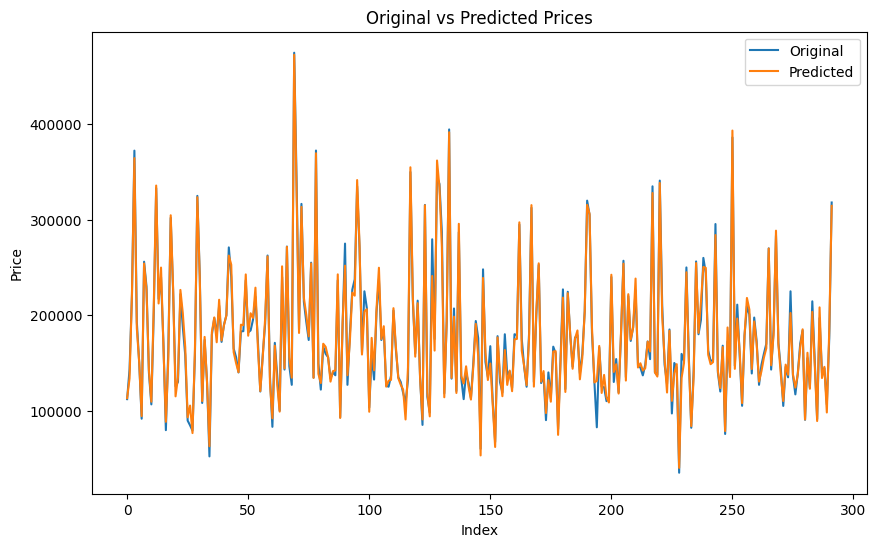

In [29]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [30]:
pred = best_model.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)